In [1]:

import pickle
import os
import sys
from EvaluationPlan import EvaluationPlan, Projection, Instance
from tree import Tree

print(sys.version)

3.8.19 (default, Mar 20 2024, 19:58:24) 
[GCC 11.2.0]


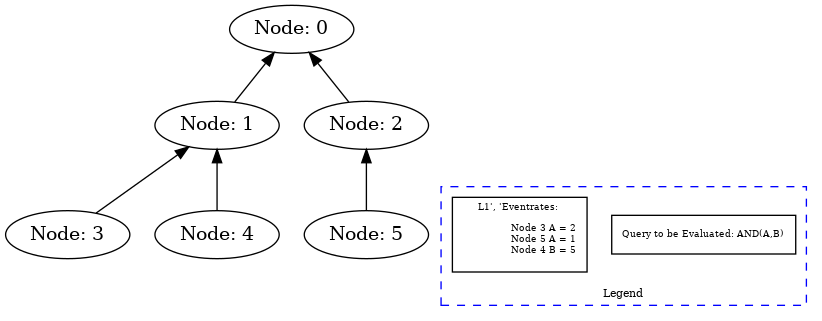

In [2]:
import networkx as nx
from graphviz import Digraph  # Correct import for Graphviz's directed graph
from IPython.display import Image

# Create a directed graph with Graphviz
dot = Digraph()
dot.attr(rankdir="BT")
# Nodes and Edges
nodes = [0, 1, 2, 3, 4, 5]
edges = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5)]

# Add nodes to the graph
for n in nodes:
    dot.node(str(n), f"Node: {n}")

# Add edges to the graph (start node, end node)
for e in edges:
    dot.edge(str(e[1]),str(e[0]))

# Create a legend as a subgraph
with dot.subgraph(name='cluster_legend') as legend:
    legend.attr(label="Legend", fontsize='8', color='blue', style='dashed')
    
    # Add legend nodes and their meaning (these are just examples)
    legend.node('L0', 'Query to be Evaluated: AND(A,B)', shape='box',height='0.4',width='0.3',fontsize='7')
    legend.node("""L1', 'Eventrates: \n
                Node 3 A = 2
                Node 5 A = 1
                Node 4 B = 5
                """, shape='box',height='0.4',width='0.3',fontsize='7')

# Render the graph and save it as an image file
output_path = dot.render('simpleTreeWithLegend', format='png')

# Display the image in Jupyter notebook
Image(output_path)


In [3]:

with open('EvaluationPlan', 'rb') as f:
    eval_plan = pickle.load(f)

for i in eval_plan:

    if isinstance(i,EvaluationPlan):
        print("Projections")
        for x in i.projections:
            print(x)
            print("-----------------")
        print("Instances")
        for y in i.instances:
            print(y)
            print("-----------------")
    elif isinstance(i,int):
        print("Number")
        print(i)
        print("-----------------")
    elif isinstance(i,dict):
        print("Dict")
        for key in i:
            print(key)
            print(i[key])
        print("-----------------")


Projections
Projection: Projection: SEQ(G, H, P)
- Combination: [H P G ] 
- Sink: [1]
Instances: 
H :  
H
Instance: H2; Source: [2] 
SEQ(G, H, P) : [2, 1] 
 
H
Instance: H5; Source: [5] 
SEQ(G, H, P) : [5, 1] 
 
H
Instance: H6; Source: [6] 
SEQ(G, H, P) : [6, 1] 
 
P :  
P
Instance: P3; Source: [3] 
SEQ(G, H, P) : [3, 1] 
 
P
Instance: P5; Source: [5] 
SEQ(G, H, P) : [5, 1] 
 
P
Instance: P6; Source: [6] 
SEQ(G, H, P) : [6, 1] 
 
G :  
G
Instance: G2; Source: [2] 
SEQ(G, H, P) : [2, 1] 
 
G
Instance: G3; Source: [3] 
SEQ(G, H, P) : [3, 1] 
 
G
Instance: G4; Source: [4] 
SEQ(G, H, P) : [4, 1] 
 
G
Instance: G5; Source: [5] 
SEQ(G, H, P) : [5, 1] 
 
G
Instance: G6; Source: [6] 
SEQ(G, H, P) : [6, 1] 
 
Filters: 
 

- Combination: [] 
- Sink: []
Instances: 
Filters: 
 

-----------------
Projection: Projection: SEQ(K, P)
- Combination: [P K ] 
- Sink: [1]
Instances: 
P :  
P
Instance: P3; Source: [1] 
SEQ(K, P) : [1] 
 
P
Instance: P5; Source: [1] 
SEQ(K, P) : [1] 
 
P
Instance: P6; Sourc

# Calculate PrePP Potential 
1. Go through the EvalPlan and find the sinks
2. for the sinks iterate through all source nodes and find highest and lowest genearting prim Event
3. lowest will be pushed entirely and the others will be pulled
4

In [4]:
with open('EvaluationPlan', 'rb') as f:
    eval_plan = pickle.load(f)
    
source_npdes = [] 

paths = {}
# Iterate over the EvaluationPlan object
for i in eval_plan:
    if isinstance(i, EvaluationPlan):
    #     print("Projections")
    #     print(i.projections[0].name)
        myEval = i.projections[0]

        myname = myEval.name.name
        myProj = myname
        myEvents = [str(x) for x in myProj.children]
        print(myEvents)
        # print(type(myname.name))
        mysinks = str(myEval.name.sinks)
        sink_node = mysinks

        gen_nodes= myEval.name.combination
        for x in gen_nodes:
            for i in gen_nodes[x]:
                # print(i)
                source_npdes.append(i.name)
                for key, path in i.routingDict.items():
                    paths[i.name] = path
        #        print(gen_nodes)
        print(f"name {myname}, sinks: {mysinks}")
        

print(source_npdes)

with open('network','rb') as f:
    nw = pickle.load(f)

# print(nw)
nodes_dict = {node.id: node for node in nw}
# print(nodes_dict)


with open('selectivities','rb') as f:
    selectivities = pickle.load(f)

with open('singleSelectivities','rb') as f:
    singleSelect = pickle.load(f)
#print(singleSelect)

import string
rates_ev = {}
rates_per_node = {}
for a in source_npdes:
    primEvent = a[0]
    nodeid = int(a[1])
    
    node = nodes_dict[nodeid]
    entry = string.ascii_uppercase.index(primEvent.upper())
    # print(entry)
    eventrate = node.eventrates[entry]
    # print(eventrate)
    if primEvent not in rates_ev:
        rates_ev[primEvent] = 0  # Initialize with 0
    if a not in rates_per_node:
        rates_per_node[a] = eventrate
    
    
    # Add the eventrate to the corresponding key in the dictionary
    rates_ev[primEvent] += eventrate

print(rates_ev)
    
# """
# Niedrigste Rate wrid gepushed

# 1. Herausfinden die Eventrates von den einzelnen Nodes. 
# 2. Summieren, welches Event wird über alle Nodes hinweg am wenigsten Produziert
# 3. Dieses Event nehmen, als Trigger um Pull Requests zu schicken an die anderen Nodes.
# 4. Kalkulation von singleSelectivitie * rates von der Node * edges * rates von pull request => Transmissions für die SEQ
# 5. Dann Herausrechnen wie viel Transmissions es geben würde, wenn alles Gepushed wird
# 6. Visualisieren
# """


['G', 'H', 'P']
name SEQ(G, H, P), sinks: [1]
['H2', 'H5', 'H6', 'P3', 'P5', 'P6', 'G2', 'G3', 'G4', 'G5', 'G6']
{'H': 3855, 'P': 60, 'G': 55}


In [5]:
print(rates_per_node)
print(paths)

{'H2': 1285, 'H5': 1285, 'H6': 1285, 'P3': 20, 'P5': 20, 'P6': 20, 'G2': 11, 'G3': 11, 'G4': 11, 'G5': 11, 'G6': 11}
{'H2': [2, 1], 'H5': [5, 1], 'H6': [6, 1], 'P3': [3, 1], 'P5': [5, 1], 'P6': [6, 1], 'G2': [2, 1], 'G3': [3, 1], 'G4': [4, 1], 'G5': [5, 1], 'G6': [6, 1]}


**G wird gepush und H und P gepulled**

In [2]:
with open('selectivities','rb') as f:
    selectivities = pickle.load(f)

with open('singleSelectivities','rb') as f:
    singleSelect = pickle.load(f)
    

print(selectivities)
print(singleSelect)


# total_transmissions_no_optimization = rates_ev['G'] + rates_ev['H'] + rates_ev['P']
print(f"Total transmissions without optimization: {total_transmissions_no_optimization}")


{'DI': 0.015730655724777373, 'ID': 0.015730655724777373, 'QH': 0.021039639647847802, 'HQ': 0.021039639647847802, 'DR': 0.0464110761245437, 'RD': 0.0464110761245437, 'TH': 0.08424045775595831, 'HT': 0.08424045775595831, 'MB': 0.09194077885460585, 'BM': 0.09194077885460585, 'RH': 0.07085222983827316, 'HR': 0.07085222983827316, 'FC': 0.08832827397443432, 'CF': 0.08832827397443432, 'RE': 0.08481527439151076, 'ER': 0.08481527439151076, 'MF': 1, 'FM': 1, 'JO': 0.01792220192349804, 'OJ': 0.01792220192349804, 'SO': 1, 'OS': 1, 'NC': 0.084460569775347, 'CN': 0.084460569775347, 'QJ': 1, 'JQ': 1, 'RO': 0.07342327757465536, 'OR': 0.07342327757465536, 'MA': 1, 'AM': 1, 'PE': 0.03905554320820427, 'EP': 0.03905554320820427, 'DG': 1, 'GD': 1, 'BF': 1, 'FB': 1, 'SM': 0.04169603936466326, 'MS': 0.04169603936466326, 'IO': 1, 'OI': 1, 'DE': 1, 'ED': 1, 'RT': 0.01614719092227264, 'TR': 0.01614719092227264, 'SE': 1, 'ES': 1, 'TE': 0.058130370793886416, 'ET': 0.058130370793886416, 'AF': 0.07022904021995192, 

NameError: name 'rates_ev' is not defined

In [7]:
# Step 2: Calculate the number of H events after G
expected_H_after_G = rates_ev['H'] * singleSelect['H|GH']

# Step 3: Calculate the number of P events after G and H
expected_P_after_GH = rates_ev['P'] * singleSelect['P|GHP']

# Total transmissions with push-pull
transmissions_with_push_pull = rates_ev['G'] + expected_H_after_G + expected_P_after_GH

print(f"Total transmissions with push-pull: {transmissions_with_push_pull}")

Total transmissions with push-pull: 196.64363127913842


In [8]:
# Function to calculate total transmissions for an event instance
def calculate_transmissions(event_instance, event_rate, path):
    num_hops = len(path) - 1  # Number of hops (nodes the event passes through)
    total_transmissions = event_rate * num_hops  # Total transmissions = event rate * hops
    return total_transmissions

# Calculate total transmissions with and without push-pull strategy
total_transmissions_no_optimization = 0
total_transmissions_with_push_pull = 0

for instance, event_rate in rates_per_node.items():
    path = paths[instance]
    
    # Transmissions without push-pull: Every event is transmitted along its path
    transmissions_no_optimization = calculate_transmissions(instance, event_rate, path)
    total_transmissions_no_optimization += transmissions_no_optimization
    
    # Push-pull strategy: Push G and pull the remaining events
    if 'G' in instance:  # Push G
        transmissions_with_push_pull = calculate_transmissions(instance, event_rate, path)
    else:  # Pull H and P based on selectivity
        if 'H' in instance:  # Pull H
            adjusted_event_rate = event_rate * singleSelect.get('H|GH', 1.0)  # Adjust for selectivity
        elif 'P' in instance:  # Pull P
            adjusted_event_rate = event_rate * singleSelect.get('P|GHP', 1.0)  # Adjust for selectivity
        transmissions_with_push_pull = calculate_transmissions(instance, adjusted_event_rate, path)
    
    total_transmissions_with_push_pull += transmissions_with_push_pull
    print(f"Instance {instance} (path {path}) has {transmissions_with_push_pull} transmissions with push-pull.")

# Calculate total transmission savings
saved_transmissions = total_transmissions_no_optimization - total_transmissions_with_push_pull

# Print results
print(f"Total transmissions without optimization: {total_transmissions_no_optimization}")
print(f"Total transmissions with push-pull: {total_transmissions_with_push_pull}")
print(f"Saved transmissions using push-pull: {saved_transmissions}")

Instance H2 (path [2, 1]) has 44.70351066089625 transmissions with push-pull.
Instance H5 (path [5, 1]) has 44.70351066089625 transmissions with push-pull.
Instance H6 (path [6, 1]) has 44.70351066089625 transmissions with push-pull.
Instance P3 (path [3, 1]) has 2.5110330988165614 transmissions with push-pull.
Instance P5 (path [5, 1]) has 2.5110330988165614 transmissions with push-pull.
Instance P6 (path [6, 1]) has 2.5110330988165614 transmissions with push-pull.
Instance G2 (path [2, 1]) has 11 transmissions with push-pull.
Instance G3 (path [3, 1]) has 11 transmissions with push-pull.
Instance G4 (path [4, 1]) has 11 transmissions with push-pull.
Instance G5 (path [5, 1]) has 11 transmissions with push-pull.
Instance G6 (path [6, 1]) has 11 transmissions with push-pull.
Total transmissions without optimization: 3970
Total transmissions with push-pull: 196.64363127913845
Saved transmissions using push-pull: 3773.3563687208616
